# MPA-MLF, Lab 6 - Feedforward Neural Networks with regularization techniques and hyperparameter tunning

## Exercise 1 - Classification of an images 

The goal of this task will be to create Multi-layer perceptron model, that is able to recognize the  CIFAR10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). The CIFAR10 dataset consist of 60000 images with resolution of 32x32 pixels. There are 10 classes in total - *airplane*, *automobile*, *bird*, *cat*, *deer*, *dog*, *frog*, *horse*, *ship*, *truck*

These is an example of the dataset:

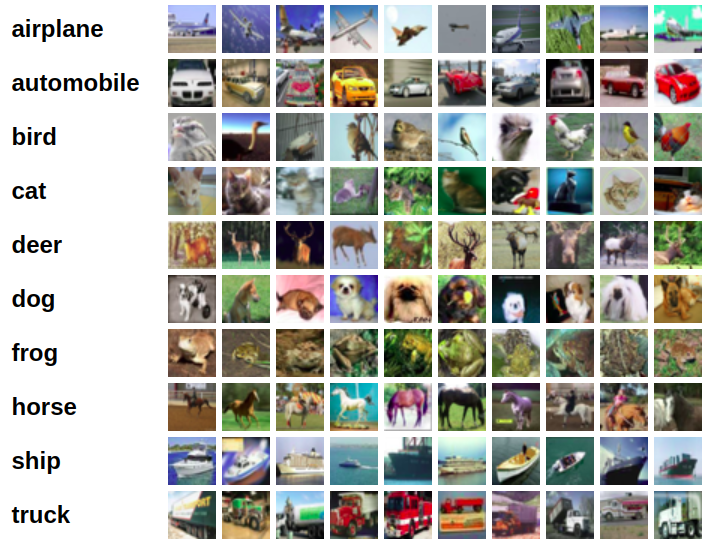

### 0. Import libraries

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Load the Dataset
The dataset is already a part of the Keras library, so we can quickly load it using the following command

In [11]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

The following numbered labels represent the labels in the dataset:

In [12]:
labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

### 2. Data Examination

Fistly, lets have a look and the couple of images we have,

In [13]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels_encoded = y_data[selected_ind]
  selected_labels = [labels[x[0]] for x in selected_labels_encoded]

  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img)

  for id_label, label in enumerate(selected_labels):
    plt.text((32/2) + 32*id_label - len(label), 32*(5/4), label)
  plt.axis('off')
  plt.show()



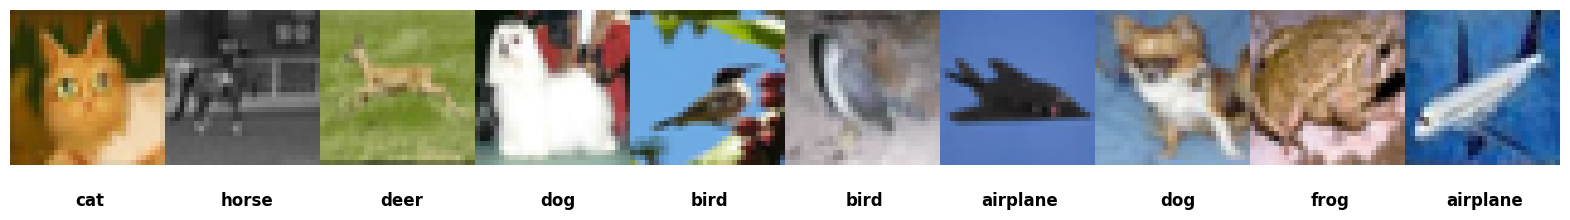

In [14]:
display_random_images(X_train, y_train)

In [15]:
#check the shape of image dataset

X_train.shape

(50000, 32, 32, 3)

In our dataset, we have 60000 images with 32x32 resolution. Each image has three channels (R, G, B). We have 50000 images for training and 10000 images for testing. Each channel for each image has values from 0 - 255, where each number represents the pixel intensity. 
With the combination of intensities of R, G and B, you can display up to 16,777,216 different colours (256^3)

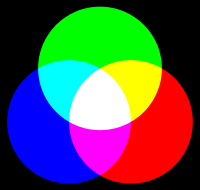

Here you can display each channel separately:

In [16]:
def display_channels_separately(image: np.array) -> None:

  plt.figure()
  fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))


  axs[0].imshow(image[:,:,0],cmap='Reds')
  axs[1].imshow(image[:,:,1],cmap='Blues')
  axs[2].imshow(image[:,:,2],cmap='Greens')

  axs[3].imshow(image)

  plt.show()

<Figure size 640x480 with 0 Axes>

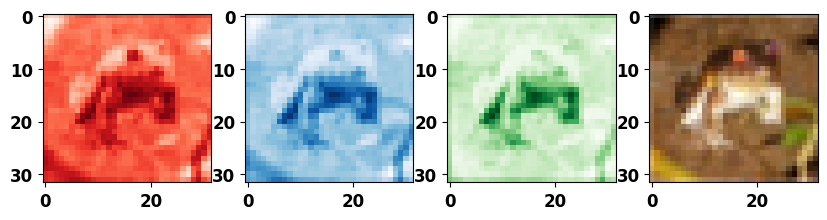

In [17]:
display_channels_separately(X_train[0])

### 3. Preprocessing of the images

For machine learning purposes, we have to preprocess our images. Firstly we need to scale our images, to scale intensity values from 0-1 (min-max scaling)

In [18]:
X_train_scaled = X_train.astype('float32') / 255.0

We need to one-hot-encode the labels in our ground truth variable as our second preprocessing.

In [19]:
y_train_encoded = to_categorical(y_train, num_classes=10)

### 4. Define the model architecture

In [20]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

C:\Users\Corentin\Desktop\MPA_MLF\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


We will define *the Sequential* model as in our last exercise. This time we will use a different approach to determine the input layers. Instead of specifying the *input_dim* parameter in our first hidden layer, we will create a **Flatten** layer that takes our 32x32x3 image and reshapes it into 1x3072. 

We will specify ten neurons in our output layer because we have 10 possible outputs and a **softmax** activation function that returns us a probability distribution over the classes. The class with the highest probability is typically chosen as the predicted class for a given input.

Check the description of our model:

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

The next step is to compile our model, we will use *categorical_crossentropy* as a loss function, *stochastic gradient descend* as an optimisation and we will be checking *the accuracy* metric.

In [22]:
optimizer = SGD(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### 5. Train the model

Our model will be trained in the same way as in our last pc_labs,

In [23]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=128, validation_split = 0.2)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1144 - loss: 2.4068 - val_accuracy: 0.1096 - val_loss: 2.2966
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1189 - loss: 2.2886 - val_accuracy: 0.1409 - val_loss: 2.2695
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1491 - loss: 2.2633 - val_accuracy: 0.1642 - val_loss: 2.2466
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1730 - loss: 2.2396 - val_accuracy: 0.1855 - val_loss: 2.2261
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1931 - loss: 2.2206 - val_accuracy: 0.2029 - val_loss: 2.2076
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2137 - loss: 2.1996 - val_accuracy: 0.2216 - val_loss: 2.1909
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2271 - loss: 2.1857 - val_accuracy: 0.2292 - val_loss: 2.1756
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2352 - loss: 2.1723 - val_accuracy: 0.

### 6. Model evaluation

In [24]:
X_test = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

In [25]:
score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')

Test loss: 2.0445985794067383
Test accuracy: 31.040000915527344 %


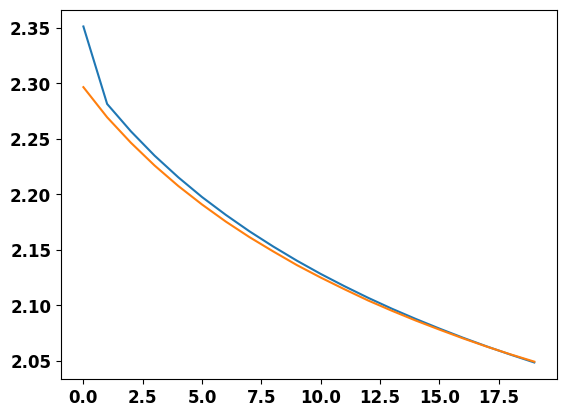

In [26]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

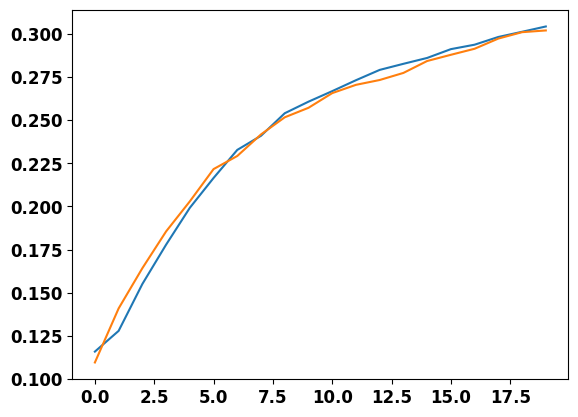

In [27]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

As you can see from the evaluation above, we was able to achive approx. 30% of an accuracy. In other word approx. 70% of an images we classified wrongly. That is really bad! 

Lets check the best predictions from our model:

In [28]:
def show_the_best_predictions(model, x_test: np.array, y_test: np.array, n_of_pred: int = 10) -> None:
  mapping = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

  predictions = model.predict(x_test)
  y_test = y_test.reshape(1,-1)
  predictions_ind = np.argmax(predictions, axis=1)
  predictions_ind = predictions_ind.reshape(1, -1)

  corect_predictions = np.where(predictions_ind == y_test)

  rows_correct = corect_predictions[1]
  predictedtions_correct = predictions[rows_correct]
  target_correct = y_test[0][rows_correct]

  max_samples = predictions[rows_correct, target_correct]
  selected_images = x_test[rows_correct]
  sorted_ind = np.argsort(max_samples)[::-1]


  images = []
  prob = []
  labels = []


  for ind in range(n_of_pred):

    index = sorted_ind[ind]

    labels.append(target_correct[index])
    prob.append(max_samples[index])
    images.append(selected_images[index])

  plt.figure(figsize=(20,10))
  
  images = np.concatenate(np.asarray(images),axis=1)
  plt.imshow(images)
  for ins in range(n_of_pred):
    texts = '{}: \n{:.3f} %'.format(mapping[labels[ins]], prob[ins]*100)
    plt.text((32/2) + 32*ins - len(mapping[labels[ins]]), 32*(5/4), texts)

  plt.axis('off')
  plt.show()


313/313 [==============================] - 1s 3ms/step


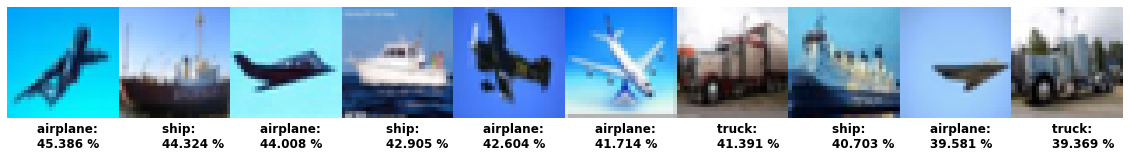

In [96]:
show_the_best_predictions(model, X_test, y_test)

### Task Description:

You task of this exercise would be to improve the model's performance to achieve better results in image classification task. There is no need to change the preprocessing of the dataset. There are possible way how to improve the models performance:

1. Hyperparameter tunning - change the hyperparameters so that the model will perform better. You can experiment with the following:
 - *changing the number of neurons in the hidden layer*
 - *changing the number of hidden layers*
 - *changing the activation functions*
 - *changing the learning rate*
 - *changing the optimizer* - So far, we have used only Gradient descend as our optimizer, but Keras offers other algorithms that can perform better - check the documentation!
 - *changing the number of learning epochs*\
 - *changing the batch size*

2. Regularization techniques - There are several regularization techniques that can improve the model's performance: 
 - *Dropout* -  In the Keras lib. you can add *dropout layer* into your Sequential model using the following command  *model.add(Dropout(p))* where *p* is an hyperparameter that controls dropout probabily, typical values are 0.1 - 0.5.
 - *L1, L2 regularization* - In keras the regularization is applied for selected layers, there is an example how to add l2 regularization to an layer (for more details check the documnetation):  *model.add(Dense(64, activation='relu', input_dim=100, kernel_regularizer=l2(0.01)))*
 - *Early stopping* -  In Keras, you can use the EarlyStopping callback to implement early stopping in your model. *early_stopping = EarlyStopping(monitor='val_loss', patience=3)*,  *model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])*


Try to make the highest testing accuracy possible. You can directly edit the code that is presented above, or you can copy everything into new cells. Please submit only the code with the best performance and briefly describe what approaches you have tried and what were the results

### WRITE YOUR DESCRIPTION IN THIS CELL ###

### Voluntary task: 
Implement one of the hyperparameter tunning algorithms discussed in the lecture, such as *Grid Search*, *Random Search* or more sophisticated ones. Some of these algorithms are already included in the Keras. Check the documentation

In [12]:
from keras.src.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def build_model(lr, dropout_rate):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=lr)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def run_experiment(run, total_runs, lr, units, optim, bs, n_hidden, dropout_rate, EPOCHS, X_train, y_train):
    print(f"Run {run}/{total_runs} | lr={lr}, units={units}, optim={optim}, bs={bs}, n_hidden={n_hidden}, dropout={dropout_rate},EPOCHS={EPOCHS}")
    model = build_model(lr, dropout_rate)
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=bs, validation_split=0.2, callbacks=[es], verbose=0)
    val_acc = max(history.history['val_accuracy'])
    print(f"Val accuracy: {val_acc:.4f}")
    return model, history, val_acc

best_lr = 0.05
best_units = 32
best_optim = 'sgd'
best_bs = 32
best_n_hidden = 2
best_dropout_rate = 0.2
best_EPOCHS = 25


Run 1/64 | lr=0.05, units=32, optim=sgd, bs=32, n_hidden=1, dropout=0.2,EPOCHS=15
Val accuracy: 0.4150
New best hyperparameters updated
Run 2/64 | lr=0.05, units=32, optim=sgd, bs=32, n_hidden=1, dropout=0.2,EPOCHS=25
Val accuracy: 0.3900
Run 3/64 | lr=0.05, units=32, optim=sgd, bs=32, n_hidden=1, dropout=0.3,EPOCHS=15
Val accuracy: 0.4100
Run 4/64 | lr=0.05, units=32, optim=sgd, bs=32, n_hidden=1, dropout=0.3,EPOCHS=25
Val accuracy: 0.4350
New best hyperparameters updated
Run 5/64 | lr=0.05, units=32, optim=sgd, bs=32, n_hidden=2, dropout=0.2,EPOCHS=15
Val accuracy: 0.3800
Run 6/64 | lr=0.05, units=32, optim=sgd, bs=32, n_hidden=2, dropout=0.2,EPOCHS=25
Val accuracy: 0.3950
Run 7/64 | lr=0.05, units=32, optim=sgd, bs=32, n_hidden=2, dropout=0.3,EPOCHS=15
Val accuracy: 0.4000
Run 8/64 | lr=0.05, units=32, optim=sgd, bs=32, n_hidden=2, dropout=0.3,EPOCHS=25
Val accuracy: 0.4100
Run 9/64 | lr=0.05, units=32, optim=sgd, bs=64, n_hidden=1, dropout=0.2,EPOCHS=15
Val accuracy: 0.3500
Run 10/

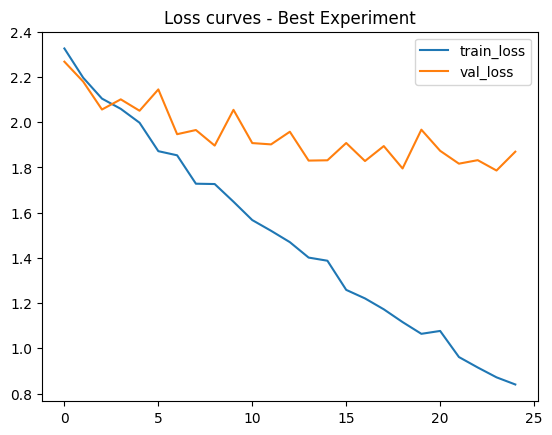

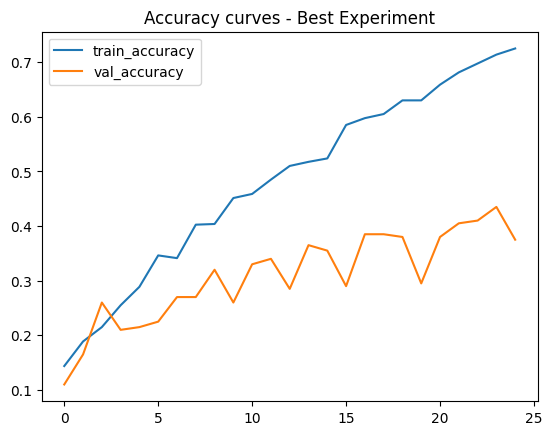

In [13]:
LEARNING_RATES = [0.05,0.01]
HIDDEN_UNITS = [32, 64]
OPTIMIZERS = ['sgd']
BATCH_SIZES = [32, 64]
HIDDEN_LAYERS = [1, 2]
DROPOUT_RATES = [0.2, 0.3]
EPOCHS_options = [15, 25]

old_X_train = X_train
X_train = X_train[0:1000]

best_val_acc = 0
total_runs = len(LEARNING_RATES) * len(HIDDEN_UNITS) * len(OPTIMIZERS) * len(BATCH_SIZES) * len(HIDDEN_LAYERS) * len(DROPOUT_RATES) * len(EPOCHS_options)
run = 1

for lr in LEARNING_RATES:
    for units in HIDDEN_UNITS:
        for optim in OPTIMIZERS:
            for bs in BATCH_SIZES:
                for n_hidden in HIDDEN_LAYERS:
                    for dropout_rate in DROPOUT_RATES:
                        for EPOCHS in EPOCHS_options:
                            model, history, val_acc = run_experiment(run, total_runs, lr, units, optim, bs, n_hidden, dropout_rate, EPOCHS, X_train, y_train)
                            if val_acc > best_val_acc:
                                best_val_acc = val_acc
                                best_lr = lr
                                best_units = units
                                best_optim = optim
                                best_bs = bs
                                best_n_hidden = n_hidden
                                best_dropout_rate = dropout_rate
                                best_EPOCHS = EPOCHS
                                best_history = history
                                print("New best hyperparameters updated")
                            run += 1

print("\nBest validation accuracy:", best_val_acc)
print("Best hyperparameters:")
print("Learning Rate:", best_lr)
print("Hidden Units:", best_units)
print("Optimizer:", best_optim)
print("Batch Size:", best_bs)
print("Hidden Layers:", best_n_hidden)
print("Dropout Rate:", best_dropout_rate)
print("EPOCHS:", best_EPOCHS)

if best_history is not None:
    plt.figure()
    plt.plot(best_history.history['loss'], label='train_loss')
    plt.plot(best_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.title("Loss curves - Best Experiment")
    plt.show()

    plt.figure()
    plt.plot(best_history.history['accuracy'], label='train_accuracy')
    plt.plot(best_history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.title("Accuracy curves - Best Experiment")
    plt.show()

X_train = old_X_train


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3176 - loss: 1.8936 - val_accuracy: 0.4679 - val_loss: 1.5473
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5022 - loss: 1.4050 - val_accuracy: 0.5365 - val_loss: 1.3401
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5394 - loss: 1.3131 - val_accuracy: 0.5404 - val_loss: 1.3328
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5627 - loss: 1.2524 - val_accuracy: 0.5565 - val_loss: 1.3019
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5897 - loss: 1.1893 - val_accuracy: 0.5831 - val_loss: 1.2134
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6045 - loss: 1.1389 - val_accuracy: 0.5783 - val_loss: 1.2395
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6232 - loss: 1.0964 - val_accuracy: 0.5788 - val_loss: 1.2212
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6338 - loss: 1.0

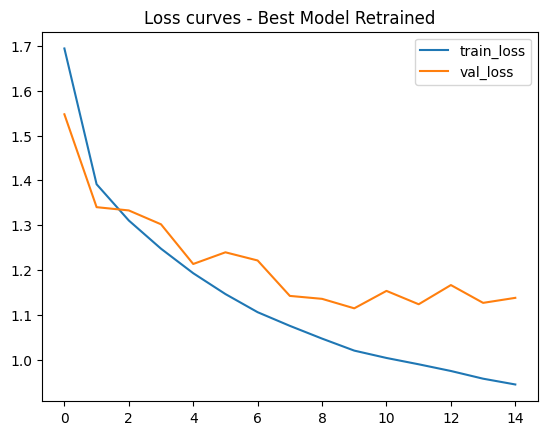

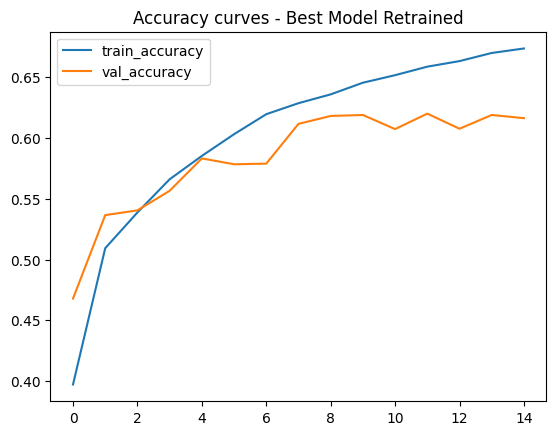

In [10]:
model_best = build_model(best_lr, best_dropout_rate)
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_best = model_best.fit(X_train, y_train, epochs=best_EPOCHS, batch_size=best_bs, validation_split=0.2, callbacks=[es], verbose=1)
test_score_best = model_best.evaluate(X_test, y_test, verbose=0)
print("\nBest model retrained on full training data")
print("Test loss:", test_score_best[0])
print("Test accuracy:", test_score_best[1])
plt.figure()
plt.plot(history_best.history['loss'], label='train_loss')
plt.plot(history_best.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Loss curves - Best Model Retrained")
plt.show()
plt.figure()
plt.plot(history_best.history['accuracy'], label='train_accuracy')
plt.plot(history_best.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title("Accuracy curves - Best Model Retrained")
plt.show()
